In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import optuna
# import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
#plt.style.use('fivethirtyeight')
import xgboost as xgb
import sklearn
import random
from NecessaryModules.getData import getData

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
filename = '../shot_listed_dataset/CoverTypeNewNormalized.csv'
dataset=getData(filename).values.tolist()
random.shuffle(dataset)
dataset=pd.DataFrame(dataset) #from dataset_list to dataset_dataframe after suffling
# print(dataset)

   Elevation    Aspect     Slope  Horizontal_Distance_To_Hydrology  \
0   0.850622  0.105556  0.150943                          0.045351   
1   0.879149  0.163889  0.188679                          0.426304   
2   0.767116  0.327778  0.320755                          0.068027   
3   0.791494  0.338889  0.226415                          0.294785   
4   0.867220  0.575000  0.584906                          0.385488   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                       -0.003509                         0.631060   
1                        0.189474                         0.177358   
2                        0.038596                         0.259652   
3                       -0.077193                         0.085486   
4                        0.314035                         0.074020   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0       0.866142        0.874016          0.548   
1       0.897638        0.866142          0.500   
2    

In [3]:
def split_data(data):
    # splitting the data
    
    msk = np.random.rand(len(data)) < 0.7
    yy = [54] #test title is 54 after suffleing the dataframe 
    train = data[msk]
    test = data[~msk]
    x_train = train[train.columns[:train.shape[1] - 1]]  # all columns except the last are x variables
    y_train = train[yy[0]].tolist()  # the last column as y variable
    x_test = test[test.columns[:test.shape[1] - 1]]
    y_test = test[yy[0]].tolist()  # the last column as y variable
    y_train = [0 if i == 7 else i for i in y_train]  # replace label 7 with 0
    y_test = [0 if i == 7 else i for i in y_test]  # replace label 7 with 0
    return x_train, y_train, x_test, y_test

# PCA implement

In [4]:
X=dataset.iloc[:,0:-1]
y=dataset.iloc[:,-1]

In [5]:
pcaTrain = PCA(n_components=40).fit(X)# --train-- pca with the "dataset" Dataframe
print(pcaTrain)
compressed_dataset_X= pcaTrain.transform(X) # --transform-- the original "dataset" Dataframe into a lower-dimensional space based on the model's learned parameters
print(type(compressed_dataset_X))
print(len(compressed_dataset_X))
print(compressed_dataset_X)

PCA(n_components=40)
<class 'numpy.ndarray'>
19229
[[-0.59184642 -0.28678847 -0.16813626 ...  0.13752462 -0.32472578
  -0.04626356]
 [-0.66997364 -0.16659338 -0.24102716 ... -0.00703179 -0.00935008
   0.01261957]
 [ 0.99705743 -0.44375106  0.10085234 ... -0.02687364  0.03521043
  -0.00612753]
 ...
 [-0.45033307 -0.45882475  0.39885536 ...  0.03701956 -0.05219603
  -0.00951535]
 [-0.68025249 -0.3110087   0.11218957 ...  0.03287617 -0.07380109
   0.0020063 ]
 [ 0.09162824  0.86211634  0.44146873 ... -0.00305776  0.03726238
   0.03024072]]


In [6]:
# from NecessaryModules.splitData import split_data
X_train, y_train, X_test, y_test = split_data(dataset)
print(len(X_train))

13453


In [7]:
compressed_dataset_X_train= pcaTrain.transform(X_train) # --transform-- the original "dataset" Dataframe into a lower-dimensional space based on the model's learned parameters
print(type(compressed_dataset_X_train))
print(len(compressed_dataset_X_train))
print(compressed_dataset_X_train)

compressed_dataset_X_test= pcaTrain.transform(X_test) # --transform-- the original "dataset" Dataframe into a lower-dimensional space based on the model's learned parameters
print(type(compressed_dataset_X_test))
print(len(compressed_dataset_X_test))
print(compressed_dataset_X_test)

<class 'numpy.ndarray'>
13453
[[ 0.99705743 -0.44375106  0.10085234 ... -0.02687364  0.03521043
  -0.00612753]
 [-0.65706753 -0.40403026  0.27275438 ... -0.04387964  0.06704086
  -0.00398991]
 [-0.05547071  1.01745965 -0.0052362  ...  0.00805786  0.02770696
  -0.02389994]
 ...
 [-0.45033307 -0.45882475  0.39885536 ...  0.03701956 -0.05219603
  -0.00951535]
 [-0.68025249 -0.3110087   0.11218957 ...  0.03287617 -0.07380109
   0.0020063 ]
 [ 0.09162824  0.86211634  0.44146873 ... -0.00305776  0.03726238
   0.03024072]]
<class 'numpy.ndarray'>
5776
[[-0.59184642 -0.28678847 -0.16813626 ...  0.13752462 -0.32472578
  -0.04626356]
 [-0.66997364 -0.16659338 -0.24102716 ... -0.00703179 -0.00935008
   0.01261957]
 [-0.64527088 -0.35607645 -0.25705735 ... -0.03407361  0.04911983
  -0.00774044]
 ...
 [ 0.7459746  -0.21773732 -0.35191095 ... -0.01217934  0.01195147
  -0.00225618]
 [ 0.07605093  1.12536694  0.08273513 ...  0.01484358 -0.03664275
   0.00878198]
 [ 0.93160225 -0.53577819  0.72465605 .

# MLP implement

In [8]:
# train the model with random parameter
from sklearn.neural_network import MLPClassifier

model_MLP = MLPClassifier(
     hidden_layer_sizes=120,
     random_state=42,
     max_iter=300,
     solver="adam"

     
     
     
        
     )

model_MLP.fit(compressed_dataset_X_train, y_train)

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=120, max_iter=300, random_state=42)

In [9]:
# Finding mean absolute error
preds = model_MLP.predict(compressed_dataset_X_test)
preds = preds.astype(int)
mae = np.abs(y_test-preds).mean()
mae

0.37465373961218834

In [10]:
#Use Optuna to find the best hyperparameters
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import StratifiedKFold
from sklearn.neural_network import MLPClassifier
K = 5 # stratified 5 fold cross validation, The folds are made by preserving the percentage of samples for each class.
skf = StratifiedKFold(n_splits = K, random_state = 42, shuffle = True)

train_tunned= np.array(compressed_dataset_X)
target_train_tunned= np.array(y)

oof_preds= np.zeros((len(train_tunned)))
abs_error_arr=[]
def objective_MLP(trial):

 for train_index, val_index in (skf.split(compressed_dataset_X,y)):
    train_X, valid_X = train_tunned[train_index], train_tunned[val_index]
    train_Y, valid_Y = target_train_tunned[train_index], target_train_tunned[val_index]
    param={
        'hidden_layer_sizes':trial.suggest_int("hidden_layer_sizes", 150, 500),
        # solver=trial.suggest_categorical("solver", ["lbfgs", "sgd", "adam"]),
        'learning_rate':trial.suggest_categorical("learning_rate", ["constant", "invscaling", "adaptive"]),
        'random_state':trial.suggest_int("random_state",0, 10),
        'max_iter':trial.suggest_int("max_iter",100,1000),
        'activation':trial.suggest_categorical("activation", ["logistic", "tanh", "relu"]),
        'batch_size':trial.suggest_int("batch_size",2,20),
        'verbose':True
    }
    model=MLPClassifier(**param)
    model.fit(train_X, train_Y)
    preds = model.predict(valid_X)
    oof_preds[val_index] = preds # preds gives total 3846 predicted value for valid_X
 mae = mean_absolute_error(target_train_tunned, oof_preds)
 return mae

In [11]:
# this is the main optuna for optimizing a object-->"objective"
study_MLP = optuna.create_study(direction='minimize')

[I 2024-02-23 12:11:31,766] A new study created in memory with name: no-name-f40d8815-a756-4aa6-9e0c-537feba5231c


In [12]:
study_MLP.optimize(objective_MLP, n_trials=5) 
print('Number of finished trials:', len(study_MLP.trials))
print('Best trial:', study_MLP.best_trial.params)

Iteration 1, loss = 1.17596323
Iteration 2, loss = 0.90652810
Iteration 3, loss = 0.88045466
Iteration 4, loss = 0.87255049
Iteration 5, loss = 0.86492548
Iteration 6, loss = 0.85946413
Iteration 7, loss = 0.85499467
Iteration 8, loss = 0.85164396
Iteration 9, loss = 0.84913193
Iteration 10, loss = 0.84451497
Iteration 11, loss = 0.84227634
Iteration 12, loss = 0.83596664
Iteration 13, loss = 0.83311524
Iteration 14, loss = 0.83293561
Iteration 15, loss = 0.82699078
Iteration 16, loss = 0.82488515
Iteration 17, loss = 0.81914919
Iteration 18, loss = 0.81571204
Iteration 19, loss = 0.81410976
Iteration 20, loss = 0.81155625
Iteration 21, loss = 0.80323406
Iteration 22, loss = 0.80208320
Iteration 23, loss = 0.79696538
Iteration 24, loss = 0.79179592
Iteration 25, loss = 0.78757741
Iteration 26, loss = 0.78739389
Iteration 27, loss = 0.78311865
Iteration 28, loss = 0.77988575
Iteration 29, loss = 0.77374446
Iteration 30, loss = 0.77245872
Iteration 31, loss = 0.76850932
Iteration 32, los

[I 2024-02-23 13:26:20,648] Trial 0 finished with value: 0.4612824379842946 and parameters: {'hidden_layer_sizes': 385, 'learning_rate': 'adaptive', 'random_state': 7, 'max_iter': 757, 'activation': 'logistic', 'batch_size': 7}. Best is trial 0 with value: 0.4612824379842946.


Iteration 527, loss = 0.48800105
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.20704193
Iteration 2, loss = 0.90810598
Iteration 3, loss = 0.87780305
Iteration 4, loss = 0.86966742
Iteration 5, loss = 0.86022516
Iteration 6, loss = 0.85452581
Iteration 7, loss = 0.85173391
Iteration 8, loss = 0.84766398
Iteration 9, loss = 0.84129601
Iteration 10, loss = 0.83760569
Iteration 11, loss = 0.83859186
Iteration 12, loss = 0.83250557
Iteration 13, loss = 0.83106537
Iteration 14, loss = 0.82733162
Iteration 15, loss = 0.82115091
Iteration 16, loss = 0.81762198
Iteration 17, loss = 0.81380883
Iteration 18, loss = 0.81184118
Iteration 19, loss = 0.80655833
Iteration 20, loss = 0.80545946
Iteration 21, loss = 0.80254011
Iteration 22, loss = 0.79715513
Iteration 23, loss = 0.79463310
Iteration 24, loss = 0.79282992
Iteration 25, loss = 0.78860473
Iteration 26, loss = 0.78735143
Iteration 27, loss = 0.78281100
Iteration 28, loss = 0

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (120) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.20829051
Iteration 2, loss = 0.91062558
Iteration 3, loss = 0.88450833
Iteration 4, loss = 0.87136773
Iteration 5, loss = 0.86162094
Iteration 6, loss = 0.85979902
Iteration 7, loss = 0.85255526
Iteration 8, loss = 0.85274395
Iteration 9, loss = 0.84646538
Iteration 10, loss = 0.84310124
Iteration 11, loss = 0.84189071
Iteration 12, loss = 0.83887774
Iteration 13, loss = 0.83401012
Iteration 14, loss = 0.83106929
Iteration 15, loss = 0.82895738
Iteration 16, loss = 0.82351718
Iteration 17, loss = 0.82034291
Iteration 18, loss = 0.81881743
Iteration 19, loss = 0.81449375
Iteration 20, loss = 0.81100454
Iteration 21, loss = 0.80867138
Iteration 22, loss = 0.80385131
Iteration 23, loss = 0.80217852
Iteration 24, loss = 0.79907305
Iteration 25, loss = 0.79454749
Iteration 26, loss = 0.79086362
Iteration 27, loss = 0.78801154
Iteration 28, loss = 0.78479847
Iteration 29, loss = 0.78009244
Iteration 30, loss = 0.77906945
Iteration 31, loss = 0.77412490
Iteration 32, los

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (120) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.20291324
Iteration 2, loss = 0.90440481
Iteration 3, loss = 0.87889620
Iteration 4, loss = 0.87034214
Iteration 5, loss = 0.86062217
Iteration 6, loss = 0.85577746
Iteration 7, loss = 0.85411732
Iteration 8, loss = 0.84974322
Iteration 9, loss = 0.84494543
Iteration 10, loss = 0.84309765
Iteration 11, loss = 0.84058909
Iteration 12, loss = 0.83571088
Iteration 13, loss = 0.83392225
Iteration 14, loss = 0.83060174
Iteration 15, loss = 0.82775848
Iteration 16, loss = 0.82479652
Iteration 17, loss = 0.81958006
Iteration 18, loss = 0.81779758
Iteration 19, loss = 0.81215050
Iteration 20, loss = 0.81196821
Iteration 21, loss = 0.80753550
Iteration 22, loss = 0.80457184
Iteration 23, loss = 0.80330943
Iteration 24, loss = 0.79708912
Iteration 25, loss = 0.79800702
Iteration 26, loss = 0.79387627
Iteration 27, loss = 0.78833898
Iteration 28, loss = 0.78693290
Iteration 29, loss = 0.78142107
Iteration 30, loss = 0.77867446
Iteration 31, loss = 0.77685706
Iteration 32, los

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (120) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.20733591
Iteration 2, loss = 0.90776436
Iteration 3, loss = 0.88325129
Iteration 4, loss = 0.86919650
Iteration 5, loss = 0.86355329
Iteration 6, loss = 0.86155479
Iteration 7, loss = 0.85478433
Iteration 8, loss = 0.85141135
Iteration 9, loss = 0.84844221
Iteration 10, loss = 0.84416195
Iteration 11, loss = 0.83961696
Iteration 12, loss = 0.83899567
Iteration 13, loss = 0.83707272
Iteration 14, loss = 0.83359997
Iteration 15, loss = 0.83037086
Iteration 16, loss = 0.82548779
Iteration 17, loss = 0.82471800
Iteration 18, loss = 0.81958076
Iteration 19, loss = 0.81863925
Iteration 20, loss = 0.81378479
Iteration 21, loss = 0.80994435
Iteration 22, loss = 0.80906526
Iteration 23, loss = 0.80365533
Iteration 24, loss = 0.80021192
Iteration 25, loss = 0.79860211
Iteration 26, loss = 0.79605320
Iteration 27, loss = 0.79161109
Iteration 28, loss = 0.78717640
Iteration 29, loss = 0.78411537
Iteration 30, loss = 0.78164694
Iteration 31, loss = 0.77519839
Iteration 32, los

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (120) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.20082540
Iteration 2, loss = 0.90059210
Iteration 3, loss = 0.87276178
Iteration 4, loss = 0.86314238
Iteration 5, loss = 0.85247481
Iteration 6, loss = 0.85053813
Iteration 7, loss = 0.84444489
Iteration 8, loss = 0.84340169
Iteration 9, loss = 0.83725904
Iteration 10, loss = 0.83181205
Iteration 11, loss = 0.82951710
Iteration 12, loss = 0.83039506
Iteration 13, loss = 0.82445059
Iteration 14, loss = 0.82130366
Iteration 15, loss = 0.81638772
Iteration 16, loss = 0.81572362
Iteration 17, loss = 0.81157961
Iteration 18, loss = 0.80817248
Iteration 19, loss = 0.80499222
Iteration 20, loss = 0.80317678
Iteration 21, loss = 0.79954814
Iteration 22, loss = 0.79593236
Iteration 23, loss = 0.79326516
Iteration 24, loss = 0.79035173
Iteration 25, loss = 0.78533532
Iteration 26, loss = 0.78547279
Iteration 27, loss = 0.78026617
Iteration 28, loss = 0.77444040
Iteration 29, loss = 0.77220544
Iteration 30, loss = 0.76706621
Iteration 31, loss = 0.76607354
Iteration 32, los

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (120) reached and the optimization hasn't converged yet.
  warnings.warn(
[I 2024-02-23 13:41:31,916] Trial 1 finished with value: 0.6000832076551043 and parameters: {'hidden_layer_sizes': 382, 'learning_rate': 'constant', 'random_state': 4, 'max_iter': 120, 'activation': 'logistic', 'batch_size': 9}. Best is trial 0 with value: 0.4612824379842946.


Iteration 120, loss = 0.59677041
Iteration 1, loss = 1.11818908
Iteration 2, loss = 0.92510088
Iteration 3, loss = 0.90776732
Iteration 4, loss = 0.89879574
Iteration 5, loss = 0.89581117
Iteration 6, loss = 0.88642252
Iteration 7, loss = 0.88278699
Iteration 8, loss = 0.87930913
Iteration 9, loss = 0.87615245
Iteration 10, loss = 0.86966076
Iteration 11, loss = 0.86700823
Iteration 12, loss = 0.85895784
Iteration 13, loss = 0.85439975
Iteration 14, loss = 0.85092004
Iteration 15, loss = 0.84372444
Iteration 16, loss = 0.84120594
Iteration 17, loss = 0.83559315
Iteration 18, loss = 0.83203008
Iteration 19, loss = 0.82727823
Iteration 20, loss = 0.82418823
Iteration 21, loss = 0.81678124
Iteration 22, loss = 0.81658349
Iteration 23, loss = 0.81100252
Iteration 24, loss = 0.80684036
Iteration 25, loss = 0.80338889
Iteration 26, loss = 0.79826799
Iteration 27, loss = 0.79665306
Iteration 28, loss = 0.78972537
Iteration 29, loss = 0.78741495
Iteration 30, loss = 0.78602004
Iteration 31, lo

[I 2024-02-23 15:29:22,127] Trial 2 finished with value: 0.5093868635914505 and parameters: {'hidden_layer_sizes': 497, 'learning_rate': 'invscaling', 'random_state': 8, 'max_iter': 610, 'activation': 'logistic', 'batch_size': 4}. Best is trial 0 with value: 0.4612824379842946.


Iteration 318, loss = 0.56388549
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.30837755
Iteration 2, loss = 0.92092882
Iteration 3, loss = 0.88031111
Iteration 4, loss = 0.86384985
Iteration 5, loss = 0.85414272
Iteration 6, loss = 0.84826471
Iteration 7, loss = 0.84248875
Iteration 8, loss = 0.84099967
Iteration 9, loss = 0.83737336
Iteration 10, loss = 0.82820146
Iteration 11, loss = 0.82560303
Iteration 12, loss = 0.82518095
Iteration 13, loss = 0.82186931
Iteration 14, loss = 0.82157952
Iteration 15, loss = 0.81540288
Iteration 16, loss = 0.81229988
Iteration 17, loss = 0.81228729
Iteration 18, loss = 0.80820720
Iteration 19, loss = 0.80100909
Iteration 20, loss = 0.80256019
Iteration 21, loss = 0.79989737
Iteration 22, loss = 0.79470399
Iteration 23, loss = 0.79375104
Iteration 24, loss = 0.78888649
Iteration 25, loss = 0.78747472
Iteration 26, loss = 0.78605872
Iteration 27, loss = 0.78517375
Iteration 28, loss = 0

[I 2024-02-23 16:45:52,237] Trial 3 finished with value: 0.4188985386655572 and parameters: {'hidden_layer_sizes': 380, 'learning_rate': 'constant', 'random_state': 2, 'max_iter': 935, 'activation': 'logistic', 'batch_size': 16}. Best is trial 3 with value: 0.4188985386655572.


Iteration 660, loss = 0.40627246
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.93196575
Iteration 2, loss = 0.75522824
Iteration 3, loss = 0.69888376
Iteration 4, loss = 0.65787805
Iteration 5, loss = 0.62541022
Iteration 6, loss = 0.59970281
Iteration 7, loss = 0.57960986
Iteration 8, loss = 0.56198380
Iteration 9, loss = 0.54767085
Iteration 10, loss = 0.53425036
Iteration 11, loss = 0.52262249
Iteration 12, loss = 0.51431266
Iteration 13, loss = 0.50330868
Iteration 14, loss = 0.49690218
Iteration 15, loss = 0.48821661
Iteration 16, loss = 0.48277495
Iteration 17, loss = 0.47649298
Iteration 18, loss = 0.47028482
Iteration 19, loss = 0.46491868
Iteration 20, loss = 0.45935600
Iteration 21, loss = 0.45522926
Iteration 22, loss = 0.45028944
Iteration 23, loss = 0.44577223
Iteration 24, loss = 0.44136323
Iteration 25, loss = 0.43647273
Iteration 26, loss = 0.43445123
Iteration 27, loss = 0.43129566
Iteration 28, loss = 0

[I 2024-02-23 17:15:19,698] Trial 4 finished with value: 0.3618492901346924 and parameters: {'hidden_layer_sizes': 300, 'learning_rate': 'adaptive', 'random_state': 7, 'max_iter': 511, 'activation': 'relu', 'batch_size': 11}. Best is trial 4 with value: 0.3618492901346924.


Iteration 294, loss = 0.23472591
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Number of finished trials: 5
Best trial: {'hidden_layer_sizes': 300, 'learning_rate': 'adaptive', 'random_state': 7, 'max_iter': 511, 'activation': 'relu', 'batch_size': 11}


In [13]:
#evaluate the trial
print("Number of finished trials: ", len(study_MLP.trials))
print("Best trial:")
trial = study_MLP.best_trial
print("  Value: ", trial.value)
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

Number of finished trials:  5
Best trial:
  Value:  0.3618492901346924
  Params: 
    hidden_layer_sizes: 300
    learning_rate: adaptive
    random_state: 7
    max_iter: 511
    activation: relu
    batch_size: 11


In [14]:
import pickle
model_tuned=MLPClassifier(**study_MLP.best_trial.params, verbose=False)
pickle.dump(model_tuned, open("all_pkl_file/all_tuned_model/PLC_MLP.pkl", "wb"))

In [15]:
from matplotlib import pyplot as plt
fig_study = optuna.visualization.plot_parallel_coordinate(study_MLP, params=["hidden_layer_sizes", "learning_rate","random_state","max_iter","batch_size"])
fig_study.show()

# process the whole data

In [16]:
filename_2 = '../shot_listed_dataset/Cover_type_whole_genuine_dataset_normalization.csv'
dataset_2=getData(filename_2).values.tolist()
random.shuffle(dataset_2)



   Elevation    Aspect     Slope  Horizontal_Distance_To_Hydrology  \
0   0.672888  0.141667  0.045455                          0.184681   
1   0.671332  0.155556  0.030303                          0.151754   
2   0.726801  0.386111  0.136364                          0.191840   
3   0.721877  0.430556  0.272727                          0.173228   
4   0.672628  0.125000  0.030303                          0.109520   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                        0.000000                         0.071659   
1                       -0.009983                         0.054798   
2                        0.108153                         0.446817   
3                        0.196339                         0.434172   
4                       -0.001664                         0.054939   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0       0.870079        0.913386       0.582677   
1       0.866142        0.925197       0.594488   
2    

In [17]:
dataset_2=pd.DataFrame(dataset_2) #from dataset_list to dataset_dataframe after suffling
print(dataset_2)

              0         1         2         3         4         5         6   \
0       0.694920  0.113889  0.257576  0.047960  0.026622  0.241253  0.862205   
1       0.680923  0.566667  0.151515  0.115963 -0.019967  0.158213  0.842520   
2       0.814671  0.811111  0.151515  0.068003  0.019967  0.446958  0.751969   
3       0.887506  0.836111  0.469697  0.163207  0.016639  0.446115  0.472441   
4       0.759979  0.222222  0.166667  0.143880 -0.043261  0.048054  0.921260   
...          ...       ...       ...       ...       ...       ...       ...   
581007  0.799119  0.419444  0.121212  0.064424  0.018303  0.519460  0.909449   
581008  0.772162  0.655556  0.106061  0.558339  0.369384  0.171140  0.818898   
581009  0.605236  0.861111  0.333333  0.182534  0.206323  0.147534  0.602362   
581010  0.804044  0.913889  0.060606  0.438082  0.028286  0.151749  0.826772   
581011  0.818818  0.302778  0.212121  0.182534  0.158070  0.689897  0.960630   

              7         8         9   .

In [18]:
# checking for NaN value
result = dataset_2.columns[dataset_2.isna().any()].tolist()
result

[]

In [19]:
X_2=dataset_2.iloc[:,0:-1]
y_2=dataset_2.iloc[:,-1]

In [20]:
X_train_2, y_train_2, X_test_2, y_test_2 = split_data(dataset_2)

In [21]:

compressed_dataset_X_2 = pcaTrain.transform(X_2) # --transform-- the original "dataset" Dataframe into a lower-dimensional space based on the model's learned parameters
print(type(compressed_dataset_X_2))

<class 'numpy.ndarray'>


In [22]:
compressed_dataset_X_train_2= pcaTrain.transform(X_train_2) # --transform-- the original "dataset" Dataframe into a lower-dimensional space based on the model's learned parameters
print(type(compressed_dataset_X_train_2))
print(len(compressed_dataset_X_train_2))
print(compressed_dataset_X_train_2)

compressed_dataset_X_test_2= pcaTrain.transform(X_test_2) # --transform-- the original "dataset" Dataframe into a lower-dimensional space based on the model's learned parameters
print(type(compressed_dataset_X_test_2))
print(len(compressed_dataset_X_test_2))
print(compressed_dataset_X_test_2)

<class 'numpy.ndarray'>
406857
[[-4.00829928e-01 -4.69301058e-01  2.51658591e-01 ... -2.79155368e-02
   3.17523377e-02  1.16821626e-03]
 [-6.16430107e-01 -3.67187438e-01 -1.92697834e-02 ... -2.79427937e-03
  -9.06782922e-04  2.25706534e-03]
 [ 4.43925800e-02  1.08184976e+00  5.30788495e-01 ... -2.80839048e-02
   2.45582854e-02  1.52630412e-02]
 ...
 [ 9.35689160e-01 -5.46872817e-01  7.83785266e-01 ... -1.43026855e-02
   2.31049195e-02  4.77725911e-03]
 [-1.90015984e-02  1.17638573e-01  3.20137877e-01 ... -7.26458405e-02
   5.89259075e-02 -1.42282087e-02]
 [ 8.99089959e-03  1.21499919e+00  1.03842242e-01 ... -6.44448169e-03
  -8.48092885e-03  1.86581661e-03]]
<class 'numpy.ndarray'>
174155
[[-0.01044112  0.78609001  0.50602595 ... -0.02611998  0.07632512
   0.00208365]
 [-0.00781461  0.90067815 -0.1294829  ...  0.00596175  0.05119342
  -0.00554176]
 [-0.63642997 -0.2001164  -0.27561292 ... -0.05690385  0.01526491
  -0.00162762]
 ...
 [-0.02893072  0.98211869 -0.04978981 ...  0.01010872 

# fit tuned MLP

In [24]:
# Let us make predictions for each of the 5 models and find mean 
# of those predictions

from tqdm import tqdm
train_MLP = np.array(compressed_dataset_X_train)
target_train_MLP= np.array(y_train)

test_MLP = np.array(compressed_dataset_X_test) # or test_Ada = np.array(X)


test_preds_MLP = np.zeros((len(test_MLP)))
oof_preds_MLP = np.zeros((len(train_MLP)))

for train_index, val_index in tqdm(skf.split(compressed_dataset_X_train,y_train), total=5):
    train_X, valid_X = train_MLP[train_index], train_MLP[val_index]
    train_y, valid_y = target_train_MLP[train_index], target_train_MLP[val_index]
    ada_params = study_MLP.best_trial.params
    model_MLP_2 = MLPClassifier(**ada_params,tol=.00001,early_stopping=True) # for early_stopping
    model_MLP_2.fit(train_X, train_y)
    # for train accuracy
    preds = model_MLP_2.predict(valid_X)
    oof_preds_MLP[val_index] = preds
    # for test accuracy
    preds = model_MLP_2.predict(test_MLP)
    test_preds_MLP += (preds)/5
print(np.abs(oof_preds_MLP-target_train_MLP).mean())

100%|██████████| 5/5 [02:51<00:00, 34.21s/it]

0.38608488812904185


In [25]:
target_test_MLP = np.array(y_test)

In [26]:
from sklearn.metrics import accuracy_score
valid_Acc_MLP=accuracy_score(target_train_MLP,oof_preds_MLP)
print(valid_Acc_MLP)

# another technique for calculate test accuracy
test_Acc_MLP=accuracy_score(target_test_MLP,test_preds_MLP.round())
print(test_Acc_MLP)

0.8063628930350107
0.7640235457063712


In [27]:
train_Acc_MLP=model_MLP_2.score(compressed_dataset_X_train,y_train)
print(train_Acc_MLP)

0.8607745484278599


In [28]:
test_Acc_MLP=model_MLP_2.score(compressed_dataset_X_test,y_test)
print(test_Acc_MLP)

0.8178670360110804


# Evaluation

In [29]:
len(y_test)

5776

**confusion-matrix**

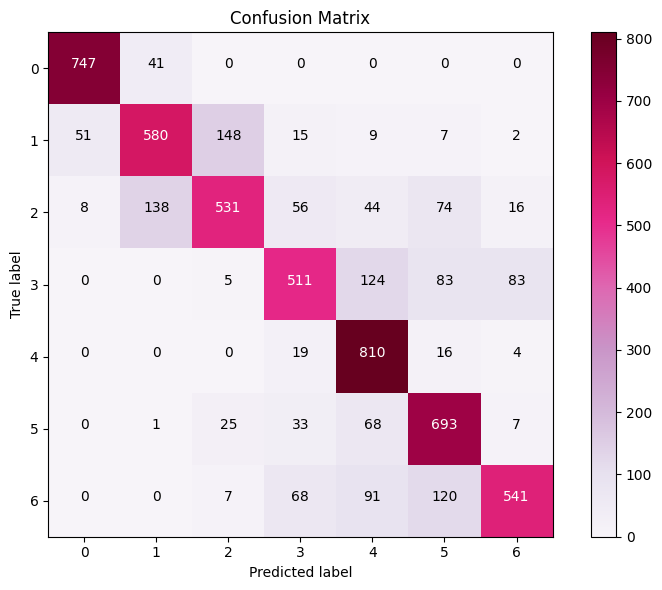

In [30]:
############# plot confusion matrix ############

from matplotlib import pyplot as plt
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, test_preds_MLP.round())
# Plot confusion matrix with custom color map

plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.PuRd)  # Set cmap to custom color map
plt.title('Confusion Matrix')
plt.colorbar()

# Adding annotations
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'), #'d = integer
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout() #improves the layout of plots by preventing overlapping elements such as axis labels, tick labels, and titles
plt.show()


**train-loss**

In [ ]:
# find the losses at each iteration
# train_losses=classifier.fit(compressedDataframeTrain, y_train).loss_curve_
train_losses=tunned_model.loss_curve_

In [ ]:
print(train_losses)
print(len(train_losses)) #384= converge at iteration 276 from max_iter 571


[1.018139743537125, 0.8398871491080491, 0.8004493668712055, 0.7699043716983041, 0.74373603839393, 0.7223123896814918, 0.7034758544257165, 0.6875908901532551, 0.6730110081992331, 0.6597644072340302, 0.6498510837060442, 0.6396747504982417, 0.6307251920120416, 0.621461270171723, 0.6130047117292743, 0.606765568488888, 0.6000990003211314, 0.5941293542425539, 0.586832667412677, 0.5799253685119561, 0.5758682631351955, 0.5703895671840727, 0.5654980496494396, 0.5602678580860742, 0.5549991189588401, 0.5508883969698828, 0.5440615147619842, 0.5415185215222991, 0.5369356630632617, 0.5326530738396661, 0.5293006639903006, 0.5249154599920377, 0.5205289113202317, 0.5176135720909906, 0.5147527427496812, 0.5116111498297335, 0.5069445391199633, 0.5026096372064954, 0.5015295502971607, 0.4965197035024674, 0.4928550295216376, 0.4887826864287143, 0.4866336596561266, 0.4854697070747538, 0.48181460233968854, 0.4798024830495578, 0.47592543129886633, 0.4738788513457339, 0.47091748945397016, 0.4695801956636619, 0.

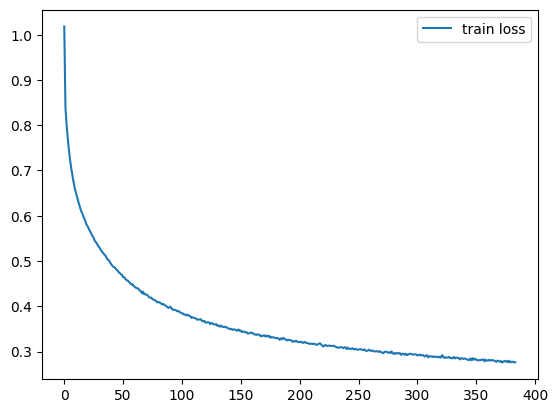

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(len(train_losses)), train_losses, label="train loss")

plt.legend()


**validation graph**

**Learning_curve********

In [ ]:

compressed_dataset_X.shape

(19229, 30)

In [ ]:
y.shape

(19229,)

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.neural_network import MLPClassifier
################# it will take 0.8 as train data from the whole by-default ################
mlp = MLPClassifier(batch_size=11, hidden_layer_sizes=212, learning_rate='adaptive',random_state=5,max_iter=1000) #tuned MLP
train_sizes, train_scores, test_scores = learning_curve(mlp, compressed_dataset_X, y, train_sizes=np.linspace(0.1, 1.0, 5))

In [ ]:
train_sizes

array([ 1538,  4999,  8460, 11921, 15383])

In [ ]:
train_scores # by-default 5-fold cross validation

array([[0.99024707, 0.98114434, 0.98114434, 0.98114434, 0.98114434],
       [0.95639128, 0.93438688, 0.94238848, 0.94238848, 0.94238848],
       [0.92174941, 0.90425532, 0.90484634, 0.92080378, 0.92080378],
       [0.91066186, 0.90202164, 0.90621592, 0.92072813, 0.91544334],
       [0.89221868, 0.89462394, 0.90561009, 0.89676916, 0.91302087]])

In [ ]:
test_scores

array([[0.67524701, 0.68720749, 0.68720749, 0.67160686, 0.67906372],
       [0.77769111, 0.7698908 , 0.76729069, 0.76859074, 0.76644993],
       [0.80655226, 0.79875195, 0.79303172, 0.79979199, 0.79141743],
       [0.8174727 , 0.81877275, 0.81929277, 0.8200728 , 0.82158648],
       [0.825013  , 0.8276131 , 0.83619345, 0.82371295, 0.8319896 ]])

In [ ]:
#***** Calculate mean and standard deviation of train and test scores (as we got values for 5 fold cross in each row****)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

In [ ]:
train_mean

array([0.98296489, 0.94358872, 0.91449173, 0.91101418, 0.90044855])

In [ ]:
train_std

array([0.00364109, 0.00711198, 0.0081262 , 0.0066029 , 0.00774467])

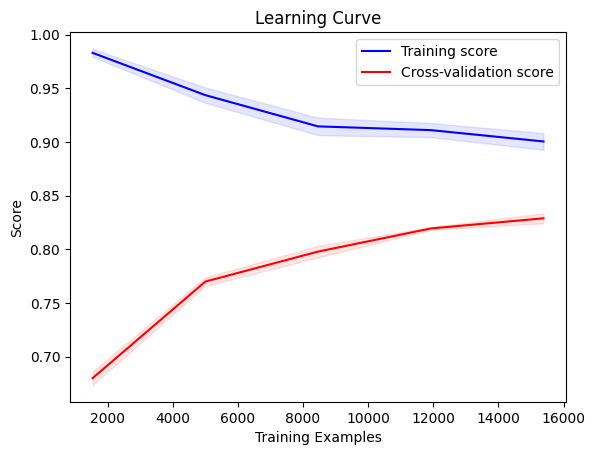

In [ ]:
# Plot learning curves
plt.figure()
plt.plot(train_sizes, train_mean, label='Training score', color='blue')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.1) #alpha=0.1: The transparency of the shaded region.
plt.plot(train_sizes, test_mean, label='Cross-validation score', color='red')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='red', alpha=0.1)
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()

**ROC_curve*******

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [ ]:
# Binarize the output
y_train = label_binarize(y_train,classes=[0,1,2,3,4,5,6])
n_classes = y_train.shape[1]
print(n_classes)
print(y_train[0])

7
[0 0 1 0 0 0 0]


In [ ]:
# Binarize the output (y_test)
y_test = label_binarize(y_test,classes=[0,1,2,3,4,5,6])
n_classes = y_test.shape[1]
print(n_classes)
print(y_test[0])

7
[1 0 0 0 0 0 0]


In [ ]:
# Learn to predict each class against the other
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(batch_size=11, hidden_layer_sizes=212, learning_rate='adaptive',random_state=5,max_iter=500) #tuned MLP
classifier = OneVsRestClassifier(clf)

# Train the classifier
classifier.fit(compressed_dataset_X_train, y_train)

OneVsRestClassifier(estimator=MLPClassifier(batch_size=11,
                                            hidden_layer_sizes=212,
                                            learning_rate='adaptive',
                                            max_iter=500, random_state=5))

In [ ]:
# Compute ROC curve and ROC area for each class
fpr = dict() #dictionary
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], classifier.predict_proba(compressed_dataset_X_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

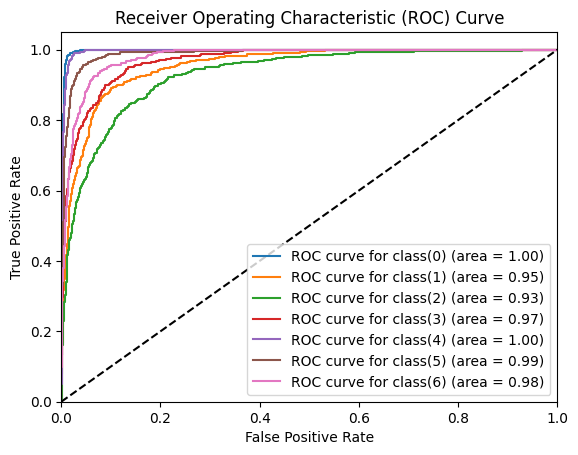

In [ ]:
# Plot ROC curve for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve for class(%i) (area = %0.2f)' % (i,roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="best")
plt.show()

# MLP with validation and early stopping

In [ ]:
from sklearn.neural_network import MLPClassifier



model=MLPClassifier(batch_size=11, hidden_layer_sizes=212, learning_rate='adaptive',
              max_iter=571, random_state=5,early_stopping=True,tol=0.0001,n_iter_no_change=10) #tuned MLP
print(model)


train_acc = model.fit(compressed_dataset_X_train, y_train).score(compressed_dataset_X_train, y_train)

test_acc=model.score(compressed_dataset_X_test,y_test)


print('train accuracy: {} \t test accuracy: {}'.format(train_acc,test_acc))



MLPClassifier(batch_size=11, early_stopping=True, hidden_layer_sizes=212,
              learning_rate='adaptive', max_iter=571, random_state=5)
train accuracy: 0.8461086828886425 	 test accuracy: 0.8105128205128205


In [ ]:
train_losses_ES=model.loss_curve_
print(len(train_losses_ES)) # converse at 329 but trining stop at 68th iteration as the validation loss increases

67


In [ ]:
validation_score_ES=model.validation_scores_
print(len(validation_score_ES))

67


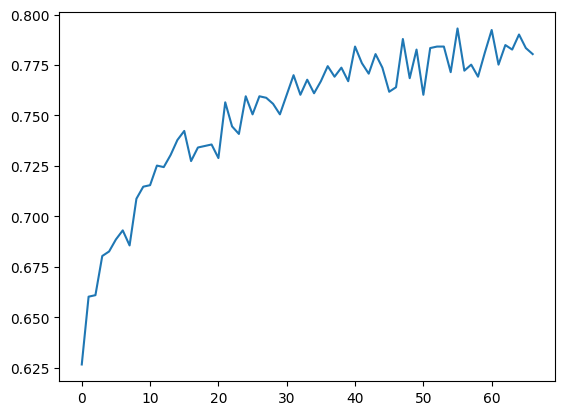

In [ ]:
plt.plot(range(len(validation_score_ES)), validation_score_ES, label="validation acc")

# with pre-tuned MLP

In [ ]:
# import torch
# from NecessaryModules.convert2Tensor import convert2Tensor
# from sklearn.neural_network import MLPClassifier

# # classifier =pickle.load(open("Classifier/MLP_model.pkl", "rb"))
# classifier=MLPClassifier(activation='tanh', batch_size=18, hidden_layer_sizes=158,
#               learning_rate='adaptive', max_iter=910, random_state=3,
#               solver='lbfgs')
# print(classifier)

# epoch=20
# train_A=[]
# valid_A=[]



# for i in (1,epoch):
#     train_acc = classifier.fit(compressedDataframeTrain, y_train).score(compressedDataframeTrain, y_train)
#     valid_acc=classifier.score(compressedDataframeValid,y_val)
    
#     train_A.append(train_acc)
#     valid_A.append(valid_acc)
#     # test_acc=classifier.fit(compressedDataframeTest, y_train).score(compressedDataframeTest,y_test)
#     # test_A.append(test_acc)

# # print('train accuracy: {} '.format(np.max(train_A)))
# print(train_A)
# print(valid_A)



In [ ]:
# test_A=[]
# for i in (1,epoch):
#     test_acc=classifier.score(compressedDataframeTest,y_test)
#     test_A.append(test_acc)
# #
# print('test accuracy: {} '.format(np.max(test_A)))